# An in depth analysis of Jill/James text messages

This notebook explores the way in which Jill and James communicate via text. The following assumptions were made in this investigation
- Contiguous messages from the same sender with < 1 minute gap MAY be considered a single message
- Jill's name is actually Jill
- This kind of analysis isn't creepy
- Data science is hawt

In [47]:
# Dependencies, data processing, the boring stuff
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import numpy as np
import pyLDAvis
import pyLDAvis.gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy

# Formats
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
date_format = '%Y-%m-D %H:%M:%S'

# Data processing
data_raw = pd.read_csv('text_log.csv')
data_raw['date'] = data_raw['date'].astype('datetime64[ns]')
data_raw['dayofweek'] = data_raw['date'].dt.dayofweek
data_raw['dayofconversation'] = data_raw['date'].dt.dayofyear - 232
data_raw['message_length'] = len(data_raw['text'])
data_raw['sentiment'] = np.array([TextBlob(message).sentiment.polarity for message in data_raw['text']])
data_raw['text_scrubbed'] = data_raw['text'].replace(stop_words, '')

In [53]:
data_raw[data_raw['dayofconversation'] == 18]

,text,has_attachment,sender,date,dayofweek,dayofconversation,message_length,sentiment,text_scrubbed
680,"Leaving coverage here, good luck on your inter...",0,James,2018-09-07 10:30:43,4,18,870,0.875000,"Leaving coverage here, good luck on your inter..."
681,I actually had a dream about you last night,0,Jill,2018-09-07 17:38:15,4,18,870,0.000000,I actually had a dream about you last night
682,Have you ever done any thesis or research on d...,0,Jill,2018-09-07 17:40:00,4,18,870,0.000000,Have you ever done any thesis or research on d...
683,￼Hey! Lucky me hearing from you! It’s cold...,1,James,2018-09-07 21:37:16,4,18,870,-0.091667,￼Hey! Lucky me hearing from you! It’s cold...
684,Haven’t done any dream reading no.,0,James,2018-09-07 21:37:16,4,18,870,0.000000,Haven’t done any dream reading no.
685,Glad to be in your dreams though,0,James,2018-09-07 21:37:26,4,18,870,0.500000,Glad to be in your dreams though
686,It was pouring just now. Glad it looks dry whe...,0,Jill,2018-09-07 22:07:01,4,18,870,0.216667,It was pouring just now. Glad it looks dry whe...


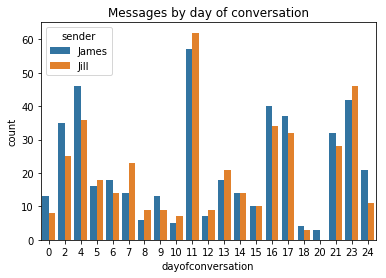

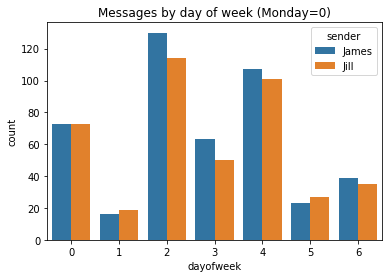

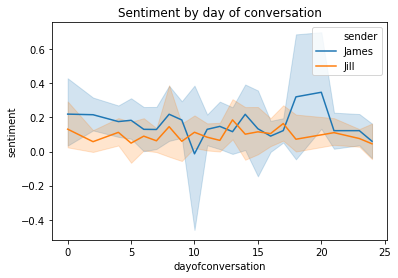

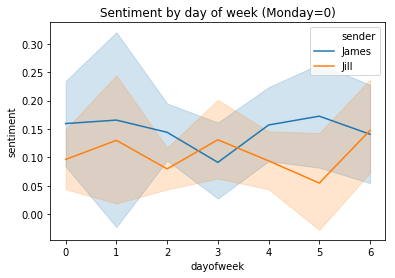

In [46]:
sns.countplot(x='dayofconversation', hue='sender', data=data_raw)
plt.title('Messages by day of conversation')
plt.show()

sns.countplot(x='dayofweek', hue='sender', data=data_raw)
plt.title('Messages by day of week (Monday=0)')
plt.show()

sns.lineplot(x="dayofconversation", y="sentiment", hue="sender", data=data_raw)
plt.title('Sentiment by day of conversation')
plt.show()

sns.lineplot(x="dayofweek", y="sentiment", hue="sender", data=data_raw)
plt.title('Sentiment by day of week (Monday=0)')
plt.show()